# Information 

Big Mart is a one stop shopping centre and free marketplace which wholesales fashion accessories, gold or silver plated chain necklaces,bodyjewelry, sunglasses, wallets, scarves, and belts.
Big mart have their branches in many countries.

# Problem Statement

To build a model that should be able to predict the sales of the Big mart stores in different countries based on the provided dataset

# Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train_data.shape

(8523, 12)

We can see that there are total 8523 rows and 12 columns in train data

# Data Visualization

# Distribution of the target variable: Item_Outlet_Sales

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

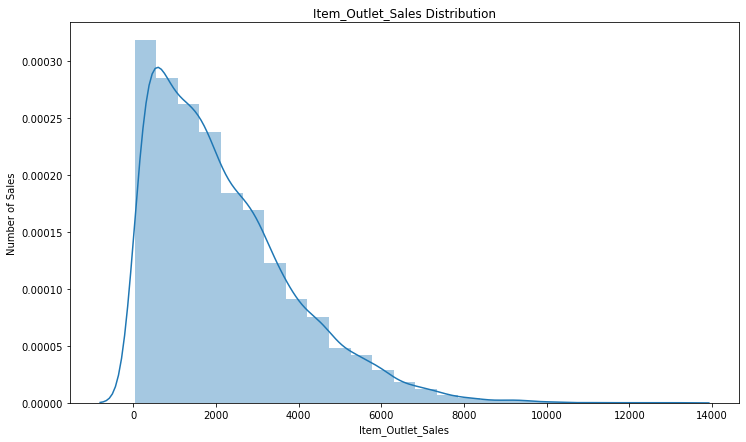

In [8]:
plt.figure(figsize=(12,7))
sns.distplot(train_data.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

We can see that our target variable is skewed towards the right. Therefore, we have to normalize it.

# Numerical Predictors

Now we will consider our independent variables. First of all, we will check for the numerical variables in our dataset:

In [9]:
num_features = train_data.select_dtypes(include=[np.number])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

We can see that out of 12 we have only 5 numeric variables.

# Correlation between Numerical Predictors and Target variable

In [100]:
corr=num_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [101]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

From the above result, we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation with our target variable.

# Categorical Predictors

# Distribution of the variable Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

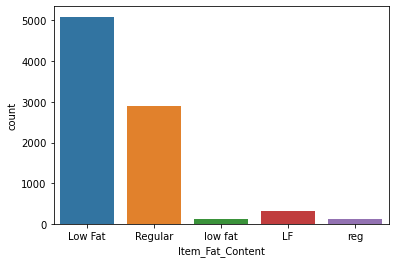

In [10]:
sns.countplot(train_data.Item_Fat_Content)

For Item_Fat_Content there are two possible type “Low Fat” or “Regular”. However, in our data it is written in different manner. We will Correct this.

# Distribution of the variable Item_Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

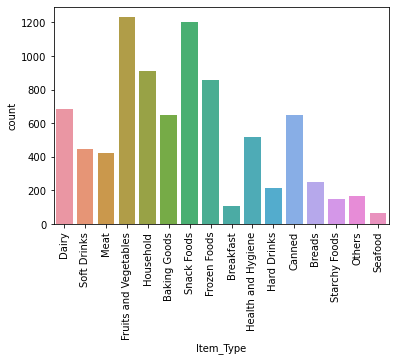

In [11]:
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

forItem_Type we have 16 different types of unique values and it is high number for categorical variable. Therefore we must try to reduce it.

# Distribution of the variable Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

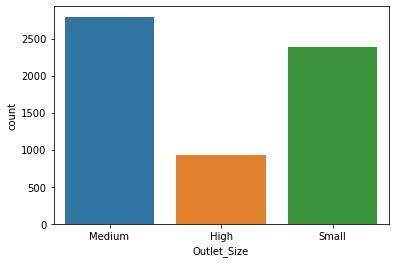

In [12]:
sns.countplot(train_data.Outlet_Size)

In [ ]:
There seems to be less number of stores with size equals to “High”

# Distribution of the variable Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

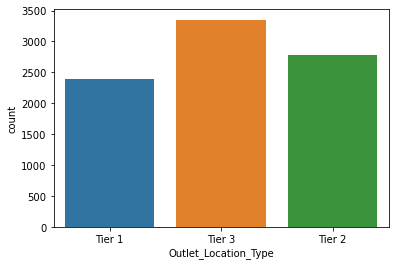

In [13]:
sns.countplot(train_data.Outlet_Location_Type)

From the above graph we can see that Bigmart is a brand of medium and small size city compare to densely populated area.

# Distribution of the variable Outlet_Type

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

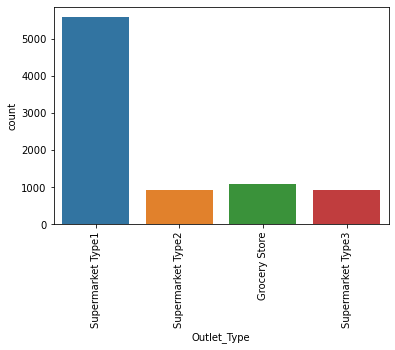

In [14]:
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=90)

There seems like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low numbers of stores, we can create a single category with all of three, but before doing this we must see their impact on target variable.

# Numerical Variables

# Item_Weight and Item_Outlet_Sales 

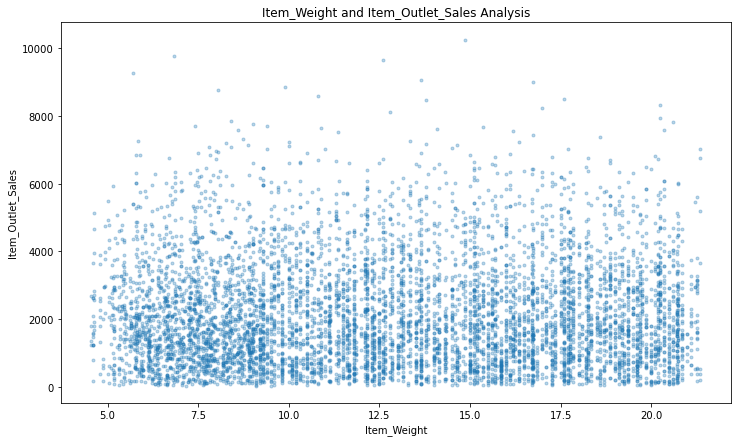

In [15]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Weight, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)

from the above scatter plot we can see that Item_Weight had a low correlation with our target variable.

# Item_Visibility and Item_Outlet_Sales

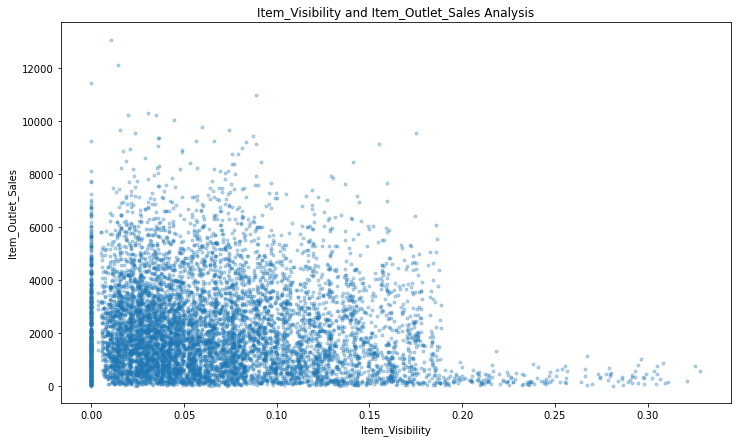

In [16]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Visibility, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)

# Outlet_Establishment_Year and Item_Outlet_Sales

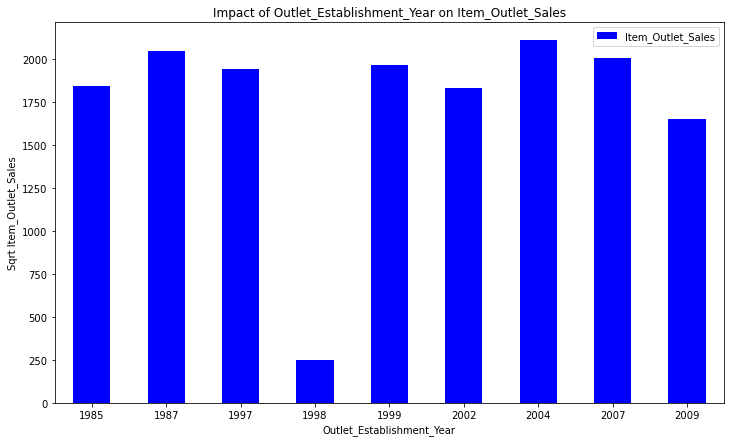

In [17]:
Outlet_Establishment_Year_pivot = train_data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

There seems to be no appreciable meaning between the year of store establishment and the sales for the items.

# Categorical Variables

# Impact of Item_Fat_Content onItem_Outlet_Sales

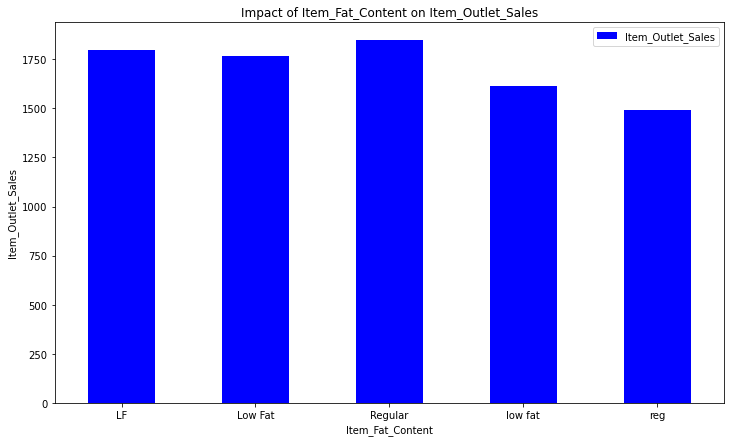

In [18]:
Item_Fat_Content_pivot = train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Low Fat products seem to higher sales than the Regular products

# Impact of Outlet_Identifier on Item_Outlet_Sales

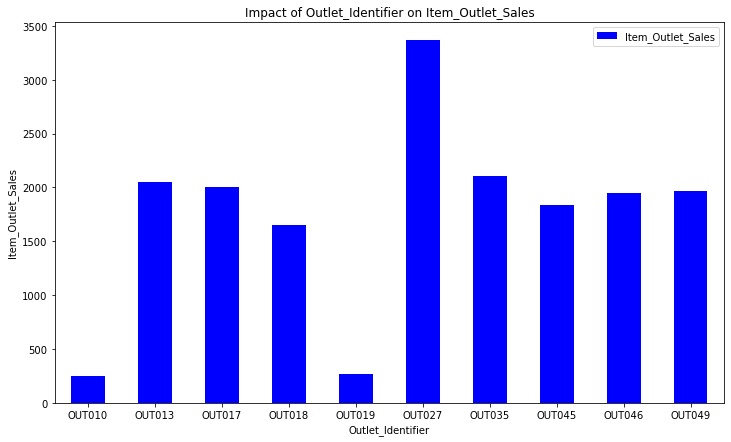

In [19]:
Outlet_Identifier_pivot = train_data.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Out of 10- There are 2 Groceries strore, 6 Supermarket Type1, 1Supermarket Type2, and 1 Supermarket Type3. 

Most of the stores are of Supermarket Type1 of size High and they do not have best results. whereas Supermarket Type3 (OUT027) is a Medium size store and have best results.

# Impact of Outlet_Size on Item_Outlet_Sales

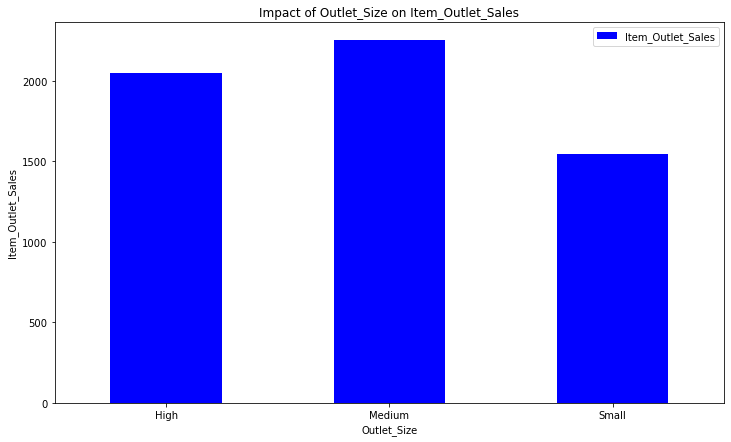

In [20]:
Outlet_Size_pivot = train_data.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

# Impact of Outlet_Type on Item_Outlet_Sales

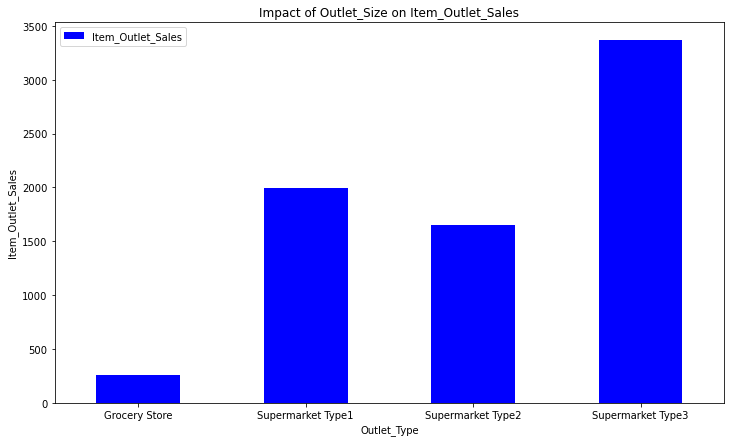

In [21]:
Outlet_Type_pivot = train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

# Impact of Outlet_Location_Type on Item_Outlet_Sales

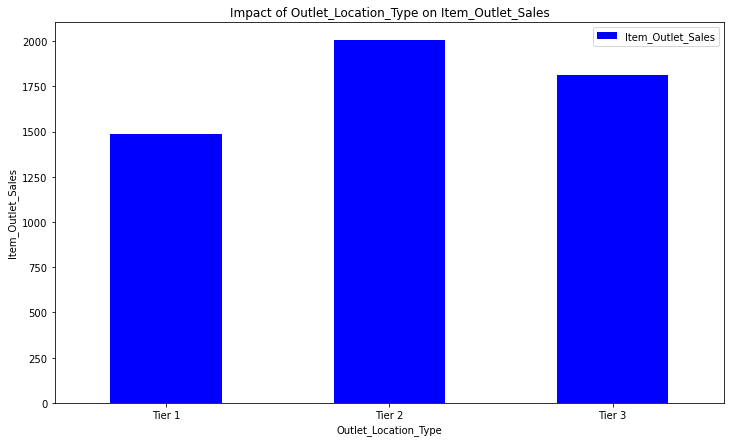

In [22]:
Outlet_Location_Type_pivot = train_data.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Tier 2 cities have the higher sales than the Tier 1 and Tier 3.

# Finding Null Values in Dataset

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 445.8 KB


Item_Weight and Outlet_Size columns contain missing values

In [25]:
corr_matrix = train_data.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

Of all the numerical features, Item_MRP seems to be have a good correlation with target variablle Item_Outlet_Sales

In [26]:
train_data.Item_Identifier.value_counts()

FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

From the above output we can say that Item_Identifier should be a categorical variable
Since Item_Weight column correlation strength is very low, can be dropped from the dataset

In [27]:
train_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

LF and low fat belong to same category - Low Fat
reg belong to Regular category

In [28]:
train_data.Item_Fat_Content = train_data.Item_Fat_Content.replace('LF', 'Low Fat')
train_data.Item_Fat_Content = train_data.Item_Fat_Content.replace('low fat', 'Low Fat')
train_data.Item_Fat_Content = train_data.Item_Fat_Content.replace('reg','Regular')

train_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
# Convert object column types to category type

train_data.Item_Identifier = train_data.Item_Identifier.astype('category')
train_data.Item_Fat_Content = train_data.Item_Fat_Content.astype('category')
train_data.Item_Type = train_data.Item_Type.astype('category')
train_data.Outlet_Identifier = train_data.Outlet_Identifier.astype('category')
train_data.Outlet_Size = train_data.Outlet_Size.astype('category')
train_data.Outlet_Location_Type = train_data.Outlet_Location_Type.astype('category')
train_data.Outlet_Type = train_data.Outlet_Type.astype('category')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 445.7 KB


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

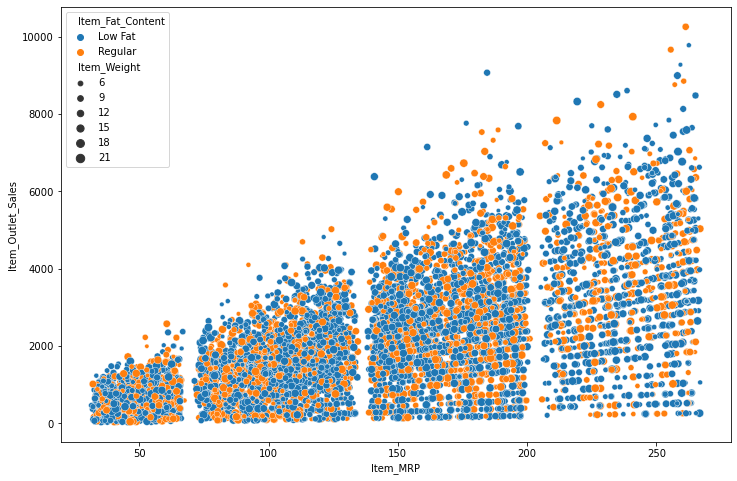

In [30]:
# Correlation strength of column Item_MRP with column Item_Outlet_Sales is very high
# Exploit Item_MRP column for further information about target column

fig, axes = plt.subplots(1, 1, figsize=(12,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', size='Item_Weight', data=train_data)

ITEM_MRP column contain prices which are in clusters. It would be better if we convert this columnn into bins for further processing.

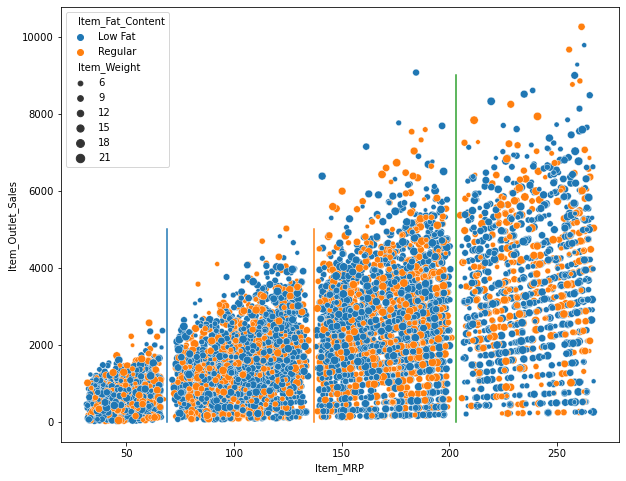

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', size='Item_Weight', data=train_data)
plt.plot([69, 69],[0, 5000])
plt.plot([137, 137],[0, 5000])
plt.plot([203, 203],[0, 9000])

The perpendicular lines can be used to divide data into proper bins. From the above graph we got bin value.

In [32]:
train_data.Item_MRP = pd.cut(train_data.Item_MRP, bins=[25, 69, 137, 203, 270], labels=['a', 'b', 'c', 'd'], right=True)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

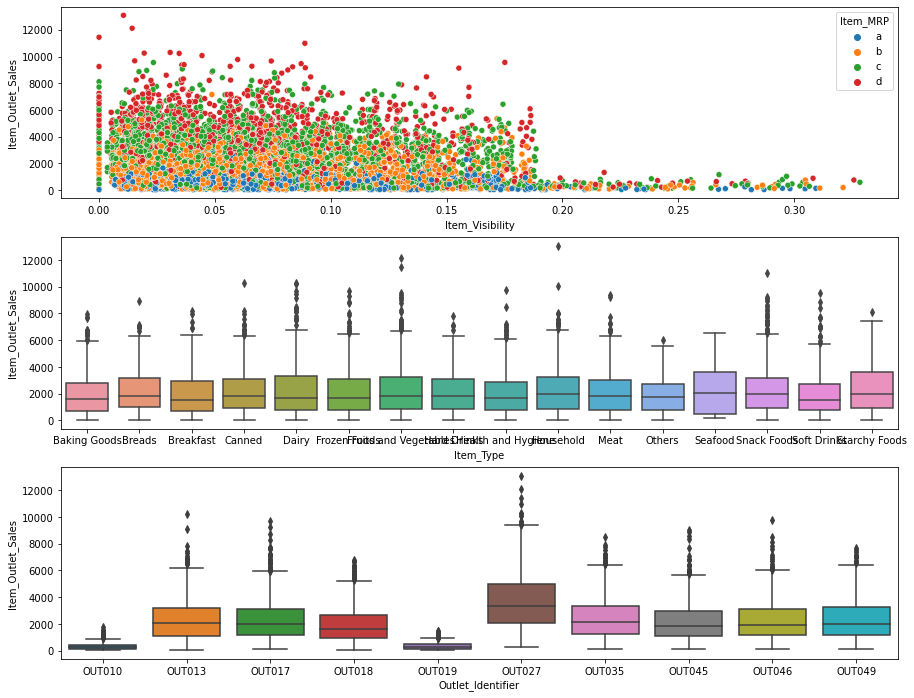

In [33]:
# Explore other columns

fig, axes = plt.subplots(3, 1, figsize=(15, 12))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_MRP', ax=axes[0], data=train_data)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', ax=axes[1], data=train_data)
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', ax=axes[2], data=train_data)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

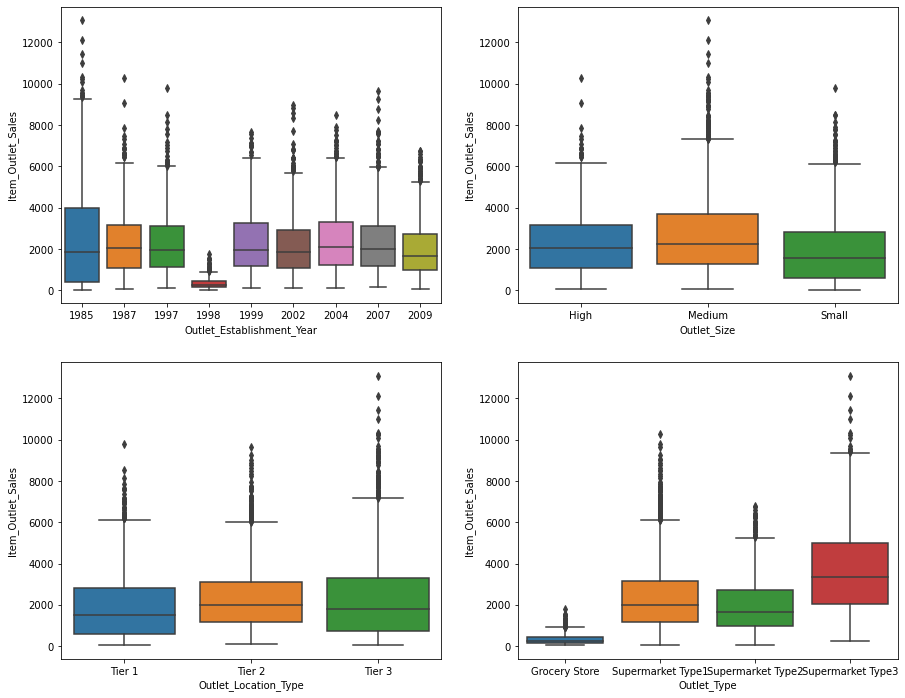

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', ax=axes[0,0], data=train_data)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', ax=axes[0,1], data=train_data)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', ax=axes[1,0], data=train_data)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', ax=axes[1,1], data=train_data)

From above plots we can say that we can drop Item_Visibility along with Item_Weight. These columns have very low correlation strength with target column.

In [35]:
# Columns for model training

attributes = ['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier',
              'Item_Type','Item_Outlet_Sales']

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

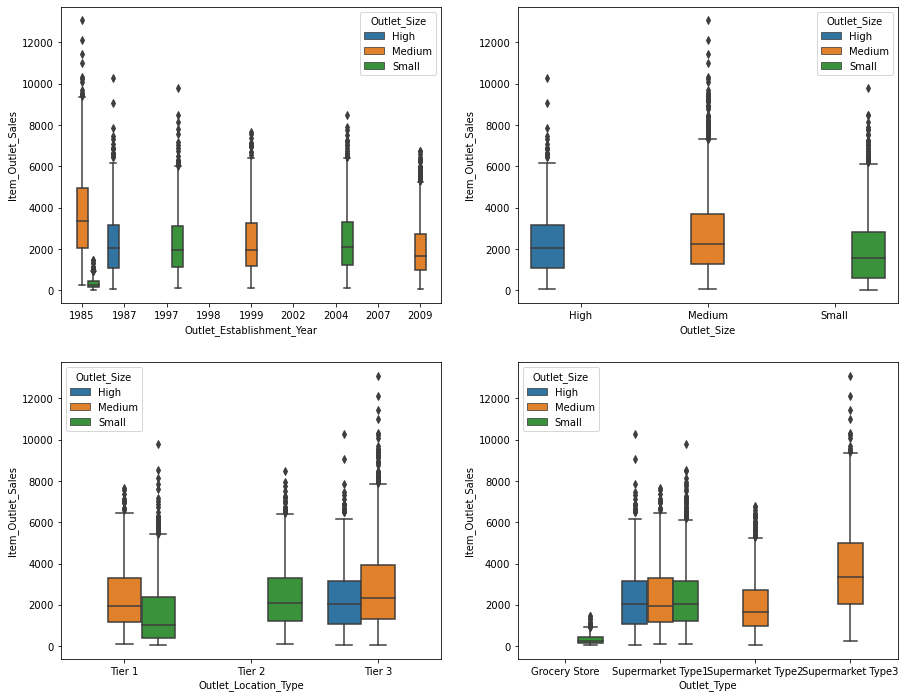

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axes[0,0], data=train_data)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axes[0,1], data=train_data)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axes[1,0], data=train_data)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axes[1,1], data=train_data)

In [43]:
data = train_data[attributes]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   8523 non-null   category
 1   Outlet_Type                8523 non-null   category
 2   Outlet_Location_Type       8523 non-null   category
 3   Outlet_Size                6113 non-null   category
 4   Outlet_Establishment_Year  8523 non-null   int64   
 5   Outlet_Identifier          8523 non-null   category
 6   Item_Type                  8523 non-null   category
 7   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(1), int64(1)
memory usage: 184.9 KB


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

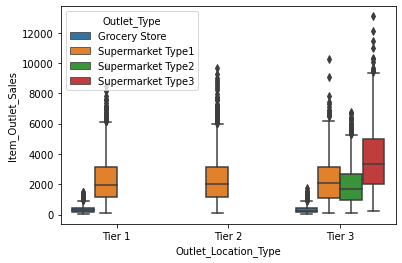

In [44]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=train_data)

In [45]:
train_data[train_data.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,b,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,c,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,a,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,a,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,d,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,c,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,d,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,a,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


When Outlet_Type is Supermarket Type1 and Outlet_Location_Type is Tier 2, Outlet_Size is null

When Outlet_Type is Grocery and Outlet_Location_Type is Tier 3, Outlet_Size is null

In [46]:
train_data.groupby(['Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'])['Outlet_Identifier'].value_counts()

Outlet_Location_Type  Outlet_Size  Outlet_Type              
Tier 1                Medium       Supermarket Type1  OUT049    930
                                                      OUT010      0
                                                      OUT013      0
                                                      OUT017      0
                                                      OUT018      0
                                                               ... 
Tier 3                Medium       Supermarket Type3  OUT019      0
                                                      OUT035      0
                                                      OUT045      0
                                                      OUT046      0
                                                      OUT049      0
Name: Outlet_Identifier, Length: 70, dtype: int64

Tier 1 have Small and Medium size stores

Tier 2 have only Small stores

Tier 3 have Medium and High size stores

In [51]:
train_data.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type              
Tier 1                Grocery Store      Small     528
                                         High        0
                                         Medium      0
                      Supermarket Type1  Medium    930
                                         Small     930
                                         High        0
Tier 2                Supermarket Type1  Small     930
                                         High        0
                                         Medium      0
Tier 3                Grocery Store      High        0
                                         Medium      0
                                         Small       0
                      Supermarket Type1  High      932
                                         Medium      0
                                         Small       0
                      Supermarket Type2  Medium    928
                                         High        0
                 

In [52]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size        
High         OUT013    932
             OUT010      0
             OUT017      0
             OUT018      0
             OUT019      0
             OUT027      0
             OUT035      0
             OUT045      0
             OUT046      0
             OUT049      0
Medium       OUT027    935
             OUT049    930
             OUT045    929
             OUT018    928
             OUT017    926
             OUT010    555
             OUT013      0
             OUT019      0
             OUT035      0
             OUT046      0
Small        OUT035    930
             OUT046    930
             OUT019    528
             OUT010      0
             OUT013      0
             OUT017      0
             OUT018      0
             OUT027      0
             OUT045      0
             OUT049      0
Name: Outlet_Identifier, dtype: int64

In [53]:
data['Outlet_Size'].isnull().value_counts()

False    8523
Name: Outlet_Size, dtype: int64

In [54]:
# data.apply(lambda x: len(x.unique()))

data['Outlet_Size'].fillna((data['Outlet_Size'].mode()[0]), inplace=True)

# Checking for Outliers

In [55]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,Medium,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

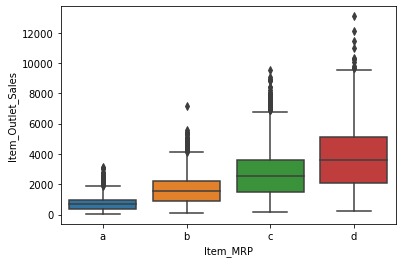

In [56]:
sns.boxplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)

In [57]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.describe()

count    2751.000000
mean     1615.644414
std      1002.562854
min        73.238000
25%       885.514000
50%      1523.350400
75%      2181.160800
max      7158.681600
Name: Item_Outlet_Sales, dtype: float64

In [58]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,Medium,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,Medium,1985,OUT027,Household,7158.6816


In [59]:
data.iloc[7796,7:] = data.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].median()
data.iloc[7796,7:]

Item_Outlet_Sales    1523.3504
Name: 7796, dtype: object

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

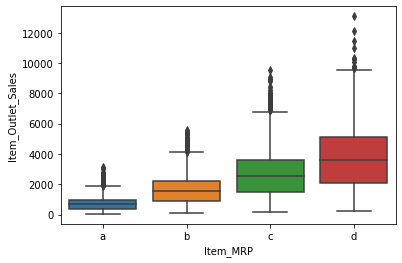

In [60]:
sns.boxplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

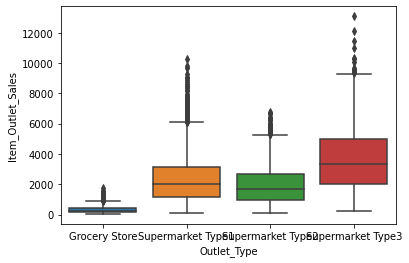

In [61]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

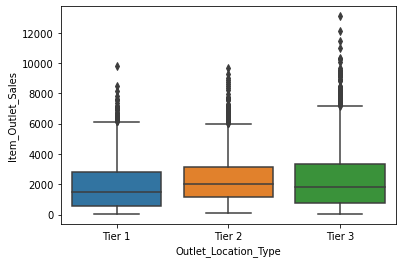

In [62]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)

In [63]:
data[data.Outlet_Location_Type == 'Tier 1'].Item_Outlet_Sales.describe()

count    2388.000000
mean     1876.909159
std      1561.649293
min        33.955800
25%       593.727150
50%      1487.397200
75%      2803.018000
max      9779.936200
Name: Item_Outlet_Sales, dtype: float64

In [64]:
data[data.Item_Outlet_Sales==9779.936200]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,Small,1997,OUT046,Health and Hygiene,9779.9362


In [65]:
data.iloc[4289,7:] = data.groupby('Outlet_Location_Type').get_group('Tier 1')['Item_Outlet_Sales'].median()
data.iloc[4289,7:]

Item_Outlet_Sales    1487.3972
Name: 4289, dtype: object

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

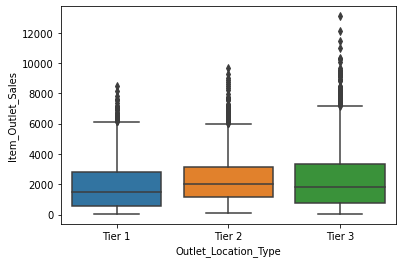

In [66]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)

In [67]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,Medium,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

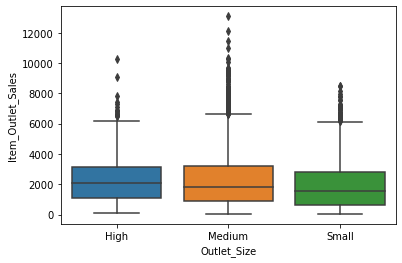

In [68]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data)

In [69]:
data[data.Outlet_Size=='High'].Item_Outlet_Sales.describe()

count      932.000000
mean      2298.995256
std       1533.531664
min         73.238000
25%       1072.603800
50%       2050.664000
75%       3166.378350
max      10256.649000
Name: Item_Outlet_Sales, dtype: float64

In [70]:
data[data.Item_Outlet_Sales==10256.649000]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4888,d,Supermarket Type1,Tier 3,High,1987,OUT013,Dairy,10256.649


In [71]:
data.iloc[4888,7:] = data.groupby('Outlet_Size').get_group('High')['Item_Outlet_Sales'].median()
data.iloc[4888,7:]

Item_Outlet_Sales    2050.664
Name: 4888, dtype: object

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

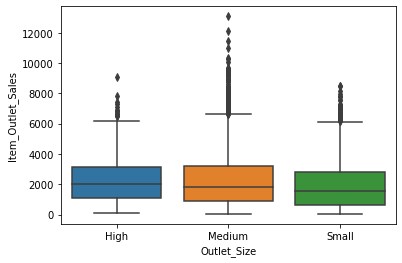

In [72]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

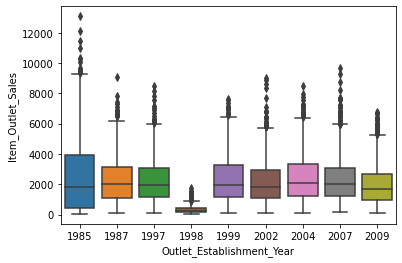

In [73]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data)

In [74]:
data.Outlet_Establishment_Year = data.Outlet_Establishment_Year.astype('category')

In [75]:
data_label = data.Item_Outlet_Sales # y
data_dummy = pd.get_dummies(data.iloc[:,0:6])

In [76]:
data_dummy['Item_Outlet_Sales'] = data_label
print(data_dummy.shape) # X
data_dummy.head()

(8523, 34)


,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,443.4228
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,732.3800
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,994.7052


# Applying ML Algorithms

In [77]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_dummy, test_size=0.20, random_state=2019)

In [82]:
train_label = train['Item_Outlet_Sales']
test_label = test['Item_Outlet_Sales']

del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

KeyError: 'Item_Outlet_Sales'

# Linear Regression Model

In [83]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train, train_label)

LinearRegression()

In [84]:
from sklearn.metrics import mean_squared_error

predict_lr = linear_reg.predict(test)
mse = mean_squared_error(test_label, predict_lr)
lr_score = np.sqrt(mse)
lr_score

1145.1331007779675

In [85]:
# Cross validation for linear regression

from sklearn.model_selection import cross_val_score

score = cross_val_score(linear_reg, train, train_label, cv=10, scoring='neg_mean_squared_error')
lr_score_cross = np.sqrt(-score)

np.mean(lr_score_cross), np.std(lr_score_cross)

(1154.2815056446236, 35.81074935794443)

# Ridge Regression

In [86]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.05, solver='cholesky')
r.fit(train, train_label)

predict_r = r.predict(test)
mse = mean_squared_error(test_label, predict_r)
r_score = np.sqrt(mse)
r_score

1144.4999184008745

In [87]:
# Cross validation Ridge
r = Ridge(alpha=0.05, solver='cholesky')
score = cross_val_score(r, train, train_label, cv=10, scoring='neg_mean_squared_error')
r_score_cross = np.sqrt(-score)
np.mean(r_score_cross), np.std(r_score_cross)

(1152.3581942626047, 35.5161858621409)

# Lasso Regression

In [88]:
from sklearn.linear_model import Lasso

l = Lasso(alpha=0.01)
l.fit(train, train_label)

predict_l = l.predict(test)
mse = mean_squared_error(test_label, predict_l)
l_score = np.sqrt(mse)
l_score

1144.5001955687896

In [89]:
# Cross validation Lasso

l = Lasso(alpha=0.01)
score = cross_val_score(l, train, train_label, cv=10, scoring='neg_mean_squared_error')
l_score_cross = np.sqrt(-score)
np.mean(l_score_cross), np.std(l_score_cross)

(1152.3581337713208, 35.516284365764506)

# Decision Tree Regressor

In [90]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train, train_label)

predict_r = dtr.predict(test)
mse = mean_squared_error(test_label, predict_r)
dtr_score = np.sqrt(mse)
dtr_score

1106.4219212663597

In [91]:
# Cross validation Decision Tree

dtr = DecisionTreeRegressor()
score = cross_val_score(dtr, train, train_label, cv=10, scoring='neg_mean_squared_error')
dtr_score_cross = np.sqrt(-score)
np.mean(dtr_score_cross), np.std(dtr_score_cross)

(1099.3154825526046, 34.29415811708024)

# Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train, train_label)
predict_rf = rf.predict(test)
mse = mean_squared_error(test_label, predict_rf)
rf_score = np.sqrt(mse)
rf_score

1106.6740701349747

In [93]:
# Cross validation Random Forest

rf = RandomForestRegressor()
score = cross_val_score(rf, train, train_label, cv=10, scoring='neg_mean_squared_error')
rf_score_cross = np.sqrt(-score)
np.mean(rf_score_cross), np.std(rf_score_cross)

(1099.3478919280674, 34.47866159312589)

# Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(train, train_label)
predict_gbr = gbr.predict(test)
gb_score = mean_squared_error(test_label, predict_gbr)
gb_score = np.sqrt(gb_score)
gb_score

1106.0633205219578

In [95]:
# Cross validation Gradient Boosting

gb = GradientBoostingRegressor()
score = cross_val_score(gb, train, train_label, cv=10, scoring='neg_mean_squared_error')
gb_score_cross = np.sqrt(-score)
np.mean(gb_score_cross), np.std(gb_score_cross)

(1098.80871464265, 34.1487166111632)

In [96]:
techniques = ['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV','Gradient Boost','Gradient Boost CV']

score_df = pd.DataFrame({'model': [lr_score,lr_score_cross,r_score,r_score_cross,l_score,l_score_cross,dtr_score,dtr_score_cross,
                                   rf_score,rf_score_cross,gb_score,gb_score_cross]}, index=techniques)

score_df['model'] = score_df.applymap(lambda x: x.mean())
score_df.model.sort_values()

Gradient Boost CV           1098.808715
Decision Tree Regression    1099.315483
Random Forest CV            1099.347892
Gradient Boost              1106.063321
Decision Tree               1106.421921
Random Forest               1106.674070
Ridge Regression            1144.499918
Lasso Regression            1144.500196
Linear Regression           1145.133101
Lasso Regression CV         1152.358134
Ridge Regression CV         1152.358194
Linear Regression CV        1154.281506
Name: model, dtype: float64

# Hyper Parameter tuning - Grid Search

In [100]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor(max_depth=7, n_estimators=200, learning_rate=0.01)

param = [{'min_samples_split':[5,9,13], 'max_leaf_nodes':[3,5,7,9], 'max_features':[8,10,15,18]}]

gs = GridSearchCV(gb, param, cv=5, scoring='neg_mean_squared_error')
gs.fit(train, train_label)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=7,
                                                 n_estimators=200),
             param_grid=[{'max_features': [8, 10, 15, 18],
                          'max_leaf_nodes': [3, 5, 7, 9],
                          'min_samples_split': [5, 9, 13]}],
             scoring='neg_mean_squared_error')

In [101]:
gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=18,
                          max_leaf_nodes=9, min_samples_split=13,
                          n_estimators=200)

In [102]:
gb = gs.best_estimator_

In [103]:
total = pd.concat([train,test], axis=0, ignore_index=True)

total_label = pd.concat([train_label, test_label], axis=0, ignore_index=True)

total_label.shape, total.shape

((8523,), (8523, 33))

In [104]:
gb.fit(total, total_label)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=18,
                          max_leaf_nodes=9, min_samples_split=13,
                          n_estimators=200)

# Test Data

In [106]:
test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test.shape

(5681, 11)

In [107]:
# Test data Columns for model training

attributes = ['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier',
              'Item_Type']

test = test[attributes]
test.shape

(5681, 7)

In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_MRP                   5681 non-null   float64
 1   Outlet_Type                5681 non-null   object 
 2   Outlet_Location_Type       5681 non-null   object 
 3   Outlet_Size                4075 non-null   object 
 4   Outlet_Establishment_Year  5681 non-null   int64  
 5   Outlet_Identifier          5681 non-null   object 
 6   Item_Type                  5681 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 310.8+ KB


In [109]:
test.Item_MRP = pd.cut(test.Item_MRP, bins=[25,75,140,205,270], labels=['a','b','c','d'],right=True)

test.Item_Type = test.Item_Type.astype('category')

test.Outlet_Size = test.Outlet_Size.astype('category')

test.Outlet_Identifier = test.Outlet_Identifier.astype('category')

test.Outlet_Type = test.Outlet_Type.astype('category')

test.Outlet_Location_Type = test.Outlet_Location_Type.astype('category')

test.Outlet_Establishment_Year = test.Outlet_Establishment_Year.astype('category')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   5681 non-null   category
 1   Outlet_Type                5681 non-null   category
 2   Outlet_Location_Type       5681 non-null   category
 3   Outlet_Size                4075 non-null   category
 4   Outlet_Establishment_Year  5681 non-null   category
 5   Outlet_Identifier          5681 non-null   category
 6   Item_Type                  5681 non-null   category
dtypes: category(7)
memory usage: 41.0 KB


In [110]:
test.Outlet_Size.isnull().value_counts()

False    4075
True     1606
Name: Outlet_Size, dtype: int64

In [111]:
test['Outlet_Size'].fillna((test['Outlet_Size'].mode()[0]), inplace=True)

In [112]:
test.Outlet_Size.isnull().value_counts()

False    5681
Name: Outlet_Size, dtype: int64

In [113]:
test_dummy = pd.get_dummies(test.iloc[:,0:6])

test_dummy.head()

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Predict the Item outlet sales for Test data

In [114]:
predict = gb.predict(test_dummy)

predict.shape

(5681,)